
<h2 align="center">Multiple Linear Regression</h2>

# Theory
Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

- $sales: $ predictor or feature
- $\beta_0: $ slope coefficient
- $\beta_1, \beta_2, \beta_3: $ intercept terms
- TV, radio, newspaper: response or target variables

### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

In [3]:
advert = pd.read_csv('YOUR/FILE/PATH/Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

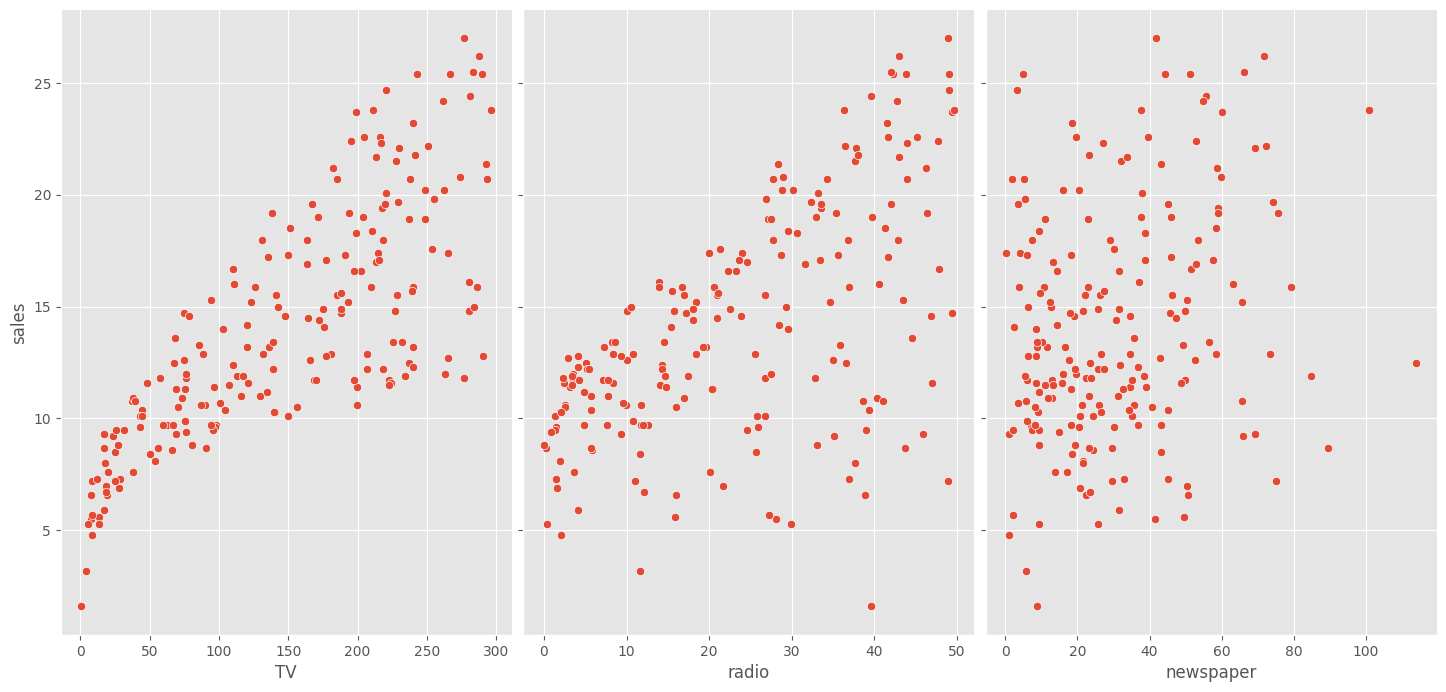

In [5]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [6]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advert[feature_cols]
y = advert.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [9]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820445),
 ('newspaper', -0.0010374930424763285)]

<Axes: >

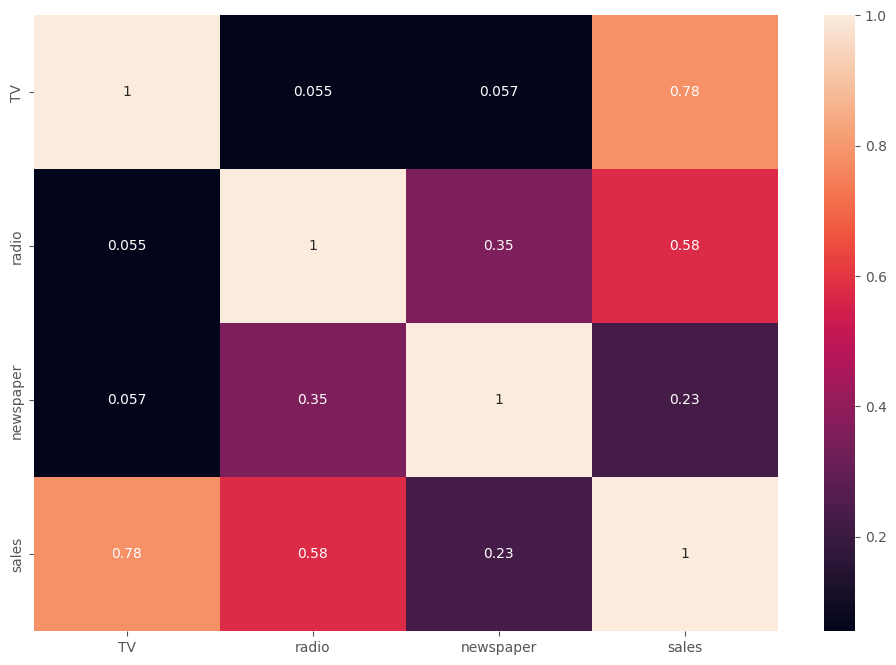

In [10]:
sns.heatmap(advert.corr(), annot=True)

### Task 5: Feature Selection

In [11]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828957


In [12]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032896
R^2:  0.9156213613792231


In [14]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382888
R^2:  0.9176214942248907


In [15]:
pip install yellowbrick


  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/282.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/282.6 kB ? eta -:--:--
   ----------------- ---------------------- 122.9/282.6 kB 1.0 MB/s eta 0:00:01
   ----------------- ---------------------- 122.9/282.6 kB 1.0 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/282.6 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 225.3/282.6 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  276.5/282.6 kB 896.4 kB/s eta 0:00:01
   -----------------------------------


[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\lokeshwagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


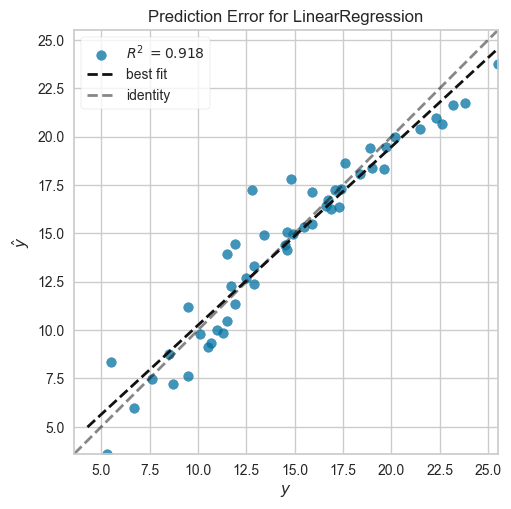

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

C:\Users\lokeshwagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


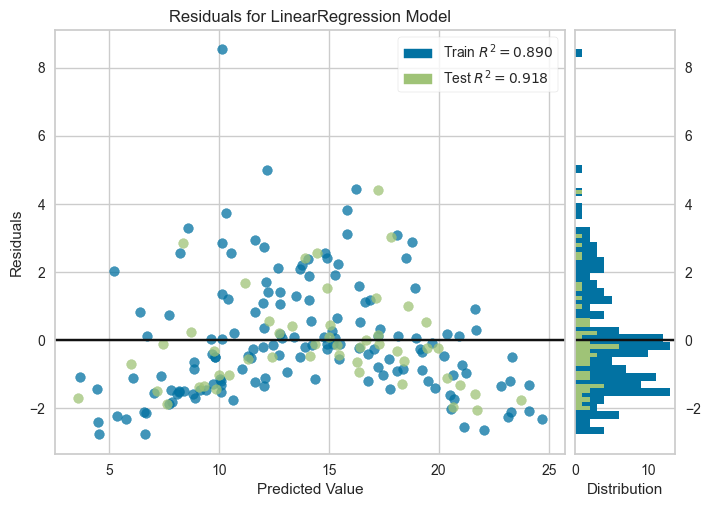

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [17]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

### Task 7: Interaction Effect (Synergy)

In [18]:
advert['interaction'] = advert['TV'] * advert['radio']

In [19]:
X = advert[['TV', 'radio', 'interaction']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 0.7011871137164328
R^2:  0.978973681468126


C:\Users\lokeshwagh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


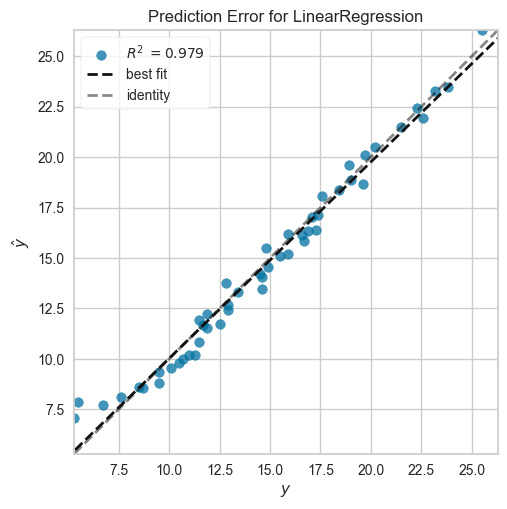

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [20]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 